In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_name = 'test_data.csv'
data = pd.read_csv('/content/' + file_name)
data['hour_beginning'] = pd.to_datetime(data['hour_beginning'])
data['day_of_week'] = data['hour_beginning'].dt.day_name()

<ipython-input-2-1a2d1c41f772>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['hour_beginning'] = pd.to_datetime(data['hour_beginning'])


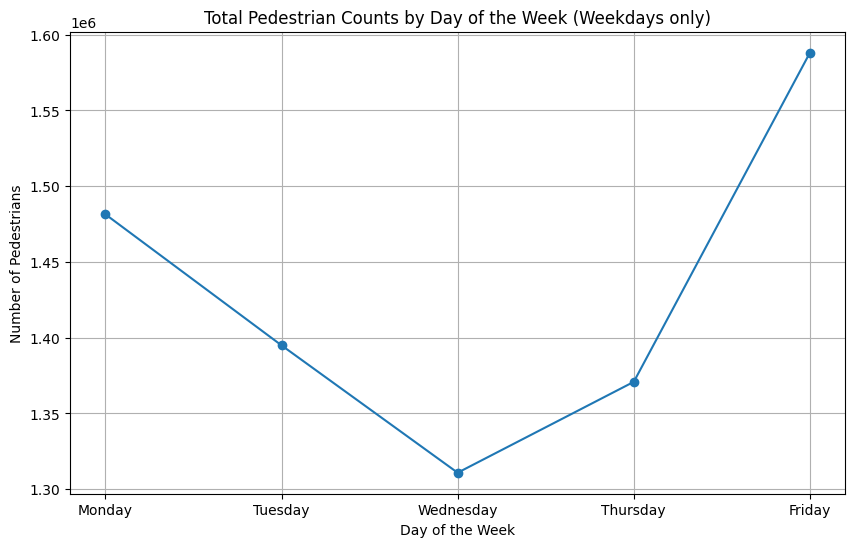

In [3]:
weekday_data = data[data['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

weekday_counts = weekday_data.groupby('day_of_week')['Pedestrians'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

plt.figure(figsize=(10, 6))
plt.plot(weekday_counts.index, weekday_counts.values, marker='o', linestyle='-')
plt.title('Total Pedestrian Counts by Day of the Week (Weekdays only)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pedestrians')
plt.grid(True)
plt.show()

The line graph above displays the total pedestrian counts for each weekday on the Brooklyn Bridge.

In [5]:
data_2019 = data[(data['hour_beginning'].dt.year == 2019) & (data['location'] == 'Brooklyn Bridge')]

weather_pedestrian_data = data_2019[['weather_summary', 'Pedestrians']]
weather_pedestrian_data = weather_pedestrian_data.dropna(subset=['weather_summary'])

weather_encoded = pd.get_dummies(weather_pedestrian_data['weather_summary'])
weather_pedestrians_encoded = pd.concat([weather_encoded, weather_pedestrian_data['Pedestrians']], axis=1)

correlation_matrix = weather_pedestrians_encoded.corr(method='pearson')['Pedestrians'].sort_values()
print(correlation_matrix)

clear-night           -0.378187
partly-cloudy-night   -0.282736
rain                  -0.138987
cloudy                -0.081933
snow                  -0.034149
fog                   -0.026531
sleet                 -0.017136
wind                  -0.000196
clear-day              0.339433
partly-cloudy-day      0.497585
Pedestrians            1.000000
Name: Pedestrians, dtype: float64


Partly-cloudy days have the highest positive correlation, indicating that  these conditions are the most favorable for pedestrians.
Clear days also show a positive correlation.
Conversely, clear nights and partly-cloudy nights have negative correlations, suggesting fewer pedestrians during these times.
Other adverse weather conditions like rain, snow, and fog are negatively correlated with pedestrian activity.
The sorted pedestrian counts by weather summary also highlight that the highest pedestrian activities occurred during partly cloudy days followed by clear days.

In [6]:
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

data['time_of_day'] = data['hour_beginning'].dt.hour.apply(categorize_time_of_day)

time_of_day_counts = data.groupby('time_of_day')['Pedestrians'].sum()
print(time_of_day_counts)

time_of_day
Afternoon    5852025
Evening      2432145
Morning      2480582
Night         268114
Name: Pedestrians, dtype: int64


Afternoon sees the highest pedestrian traffic on the Brooklyn Bridge.
Morning and Evening also experience significant amounts of pedestrian activity, but less than the afternoon.
Night time has the least pedestrian traffic, which is expected due to reduced visibility and possibly fewer people commuting or walking for leisure during these hours.
